# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
!pip install cufflinks

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import cufflinks as cf
cf.go_offline()

C:\Users\ashut\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
!pip install pandas_datareader

In [5]:
from pandas_datareader import data, wb
from sklearn.preprocessing import MinMaxScaler

import datetime

In [6]:
import plotly.io as pio
pio.renderers.default="colab"

# Downloading the Dataset

Setting Up the period duration for the dataset we want to download

Stock Prediction on the data of six banks for the specified duration

These are bank names for which we will download the data :-
1. Bank Of America - BAC
2. Citi Group - C
3. Goldman Sachs - GS
4. JPMorgan Chase - JPM
5. Morgan Stanley - MS
6. Wells Fargo - WFC

Downloading the data from stooq from the bank

In [7]:
start = datetime.datetime(2004,1,1)
end = datetime.datetime.now()

df = data.DataReader(["BAC","C","GS","JPM","MS","WFC"],'stooq',start,end)

In [8]:
df.head()

Attributes    Close                                             High           \
Symbols         BAC        C       GS      JPM  MS      WFC      BAC        C   
Date                                                                            
2004-01-02  33.2837  405.492  79.8025  26.4022 NaN  20.9342  33.8494  407.577   
2004-01-05  33.3790  412.032  79.8457  26.3520 NaN  21.0378  33.4959  412.100   
2004-01-06  33.3191  412.453  79.3645  27.0142 NaN  20.9628  33.4134  412.776   
2004-01-07  33.2503  413.020  81.0345  27.4112 NaN  20.7575  33.3191  415.174   
2004-01-08  33.2592  414.773  81.1334  27.8817 NaN  20.7407  33.3034  415.644   

Attributes                    ...     Open                        \
Symbols          GS      JPM  ...       GS      JPM  MS      WFC   
Date                          ...                                  
2004-01-02  81.4108  26.7254  ...  81.1727  26.3590 NaN  21.0526   
2004-01-05  80.4660  26.5770  ...  79.9388  26.4326 NaN  20.9342   
2004-01-06  80.2436  27.0888  ...  79.9897  26.7844 NaN  20.9204   
2004-01-07  81.2226  27.4612  ...  79.4978  27.0378 NaN  20.7921   
2004-01-08  81.3236  27.9544  ...  81.1148  27.4672 NaN  20.7575   

Attributes        Volume                                                \
Symbols              BAC             C            GS           JPM  MS   
Date                                                                     
2004-01-02  2.007856e+07  1.687031e+06  3.702935e+06  1.287192e+07 NaN   
2004-01-05  1.727127e+07  1.766412e+06  5.863864e+06  1.347415e+07 NaN   
2004-01-06  1.792241e+07  1.301527e+06  4.963299e+06  2.941768e+07 NaN   
2004-01-07  1.585824e+07  1.455081e+06  5.425807e+06  2.007328e+07 NaN   
2004-01-08  1.655715e+07  1.636903e+06  4.586952e+06  1.663134e+07 NaN   

Attributes                
Symbols              WFC  
Date                      
2004-01-02  1.145501e+07  
2004-01-05  1.229148e+07  
2004-01-06  1.164620e+07  
2004-01-07  1.482675e+07  
2004-01-08  1.650388e+07  

[5 rows x 30 columns]

In [9]:
df.columns

MultiIndex([( 'Close', 'BAC'),
            ( 'Close',   'C'),
            ( 'Close',  'GS'),
            ( 'Close', 'JPM'),
            ( 'Close',  'MS'),
            ( 'Close', 'WFC'),
            (  'High', 'BAC'),
            (  'High',   'C'),
            (  'High',  'GS'),
            (  'High', 'JPM'),
            (  'High',  'MS'),
            (  'High', 'WFC'),
            (   'Low', 'BAC'),
            (   'Low',   'C'),
            (   'Low',  'GS'),
            (   'Low', 'JPM'),
            (   'Low',  'MS'),
            (   'Low', 'WFC'),
            (  'Open', 'BAC'),
            (  'Open',   'C'),
            (  'Open',  'GS'),
            (  'Open', 'JPM'),
            (  'Open',  'MS'),
            (  'Open', 'WFC'),
            ('Volume', 'BAC'),
            ('Volume',   'C'),
            ('Volume',  'GS'),
            ('Volume', 'JPM'),
            ('Volume',  'MS'),
            ('Volume', 'WFC')],
           names=['Attributes', 'Symbols'])

In [10]:
df.index.names

FrozenList(['Date'])

<b>The Close Section is iterated to find the maximum closing stock value for each of the respective bank for the data duration</b>

In [11]:
df.xs(key='Close',axis=1, level = 'Attributes').max()

Symbols
BAC     48.2567
C      466.8120
GS     410.7930
JPM    166.5240
MS     105.7610
WFC     57.9642
dtype: float64

In [12]:
df.Close.head()

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2004-01-02,33.2837,405.492,79.8025,26.4022,NaN,20.9342
2004-01-05,33.3790,412.032,79.8457,26.3520,NaN,21.0378
2004-01-06,33.3191,412.453,79.3645,27.0142,NaN,20.9628
2004-01-07,33.2503,413.020,81.0345,27.4112,NaN,20.7575
2004-01-08,33.2592,414.773,81.1334,27.8817,NaN,20.7407


In [13]:
returns = pd.DataFrame()

**Applying percentage change method from the pandas library in order to get an idea about the percentage change between the values with time**

In [14]:
returns = df.xs(key='Close',axis=1,level='Attributes').pct_change()

returns.head()

Symbols,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.002863,0.016129,0.000541,-0.001901,NaN,0.004949
2004-01-06,-0.001795,0.001022,-0.006027,0.025129,NaN,-0.003565
2004-01-07,-0.002065,0.001375,0.021042,0.014696,NaN,-0.009794
2004-01-08,0.000268,0.004244,0.001220,0.017165,NaN,-0.000809


In [15]:
# Renaming the columns
returns=returns.rename(columns={"BAC":"BAC return","C":"C return","GS":"GS return","JPM":"JPM return","MS":"MS return","WFC":"WFC return"})
returns.head(50)

Symbols,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2004-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2004-01-05,0.002863,0.016129,0.000541,-0.001901,NaN,0.004949
2004-01-06,-0.001795,0.001022,-0.006027,0.025129,NaN,-0.003565
2004-01-07,-0.002065,0.001375,0.021042,0.014696,NaN,-0.009794
2004-01-08,0.000268,0.004244,0.001220,0.017165,NaN,-0.000809
2004-01-09,-0.008858,-0.004627,-0.012670,0.002328,NaN,-0.004325
2004-01-12,0.002087,-0.000758,0.002876,0.000737,NaN,-0.007554
2004-01-13,-0.002588,-0.005078,-0.001148,0.002950,NaN,-0.011939
2004-01-14,0.012013,0.008086,0.017525,0.008125,NaN,0.000681


# Visualizing

<b> Visualizing the trends from the data</b>

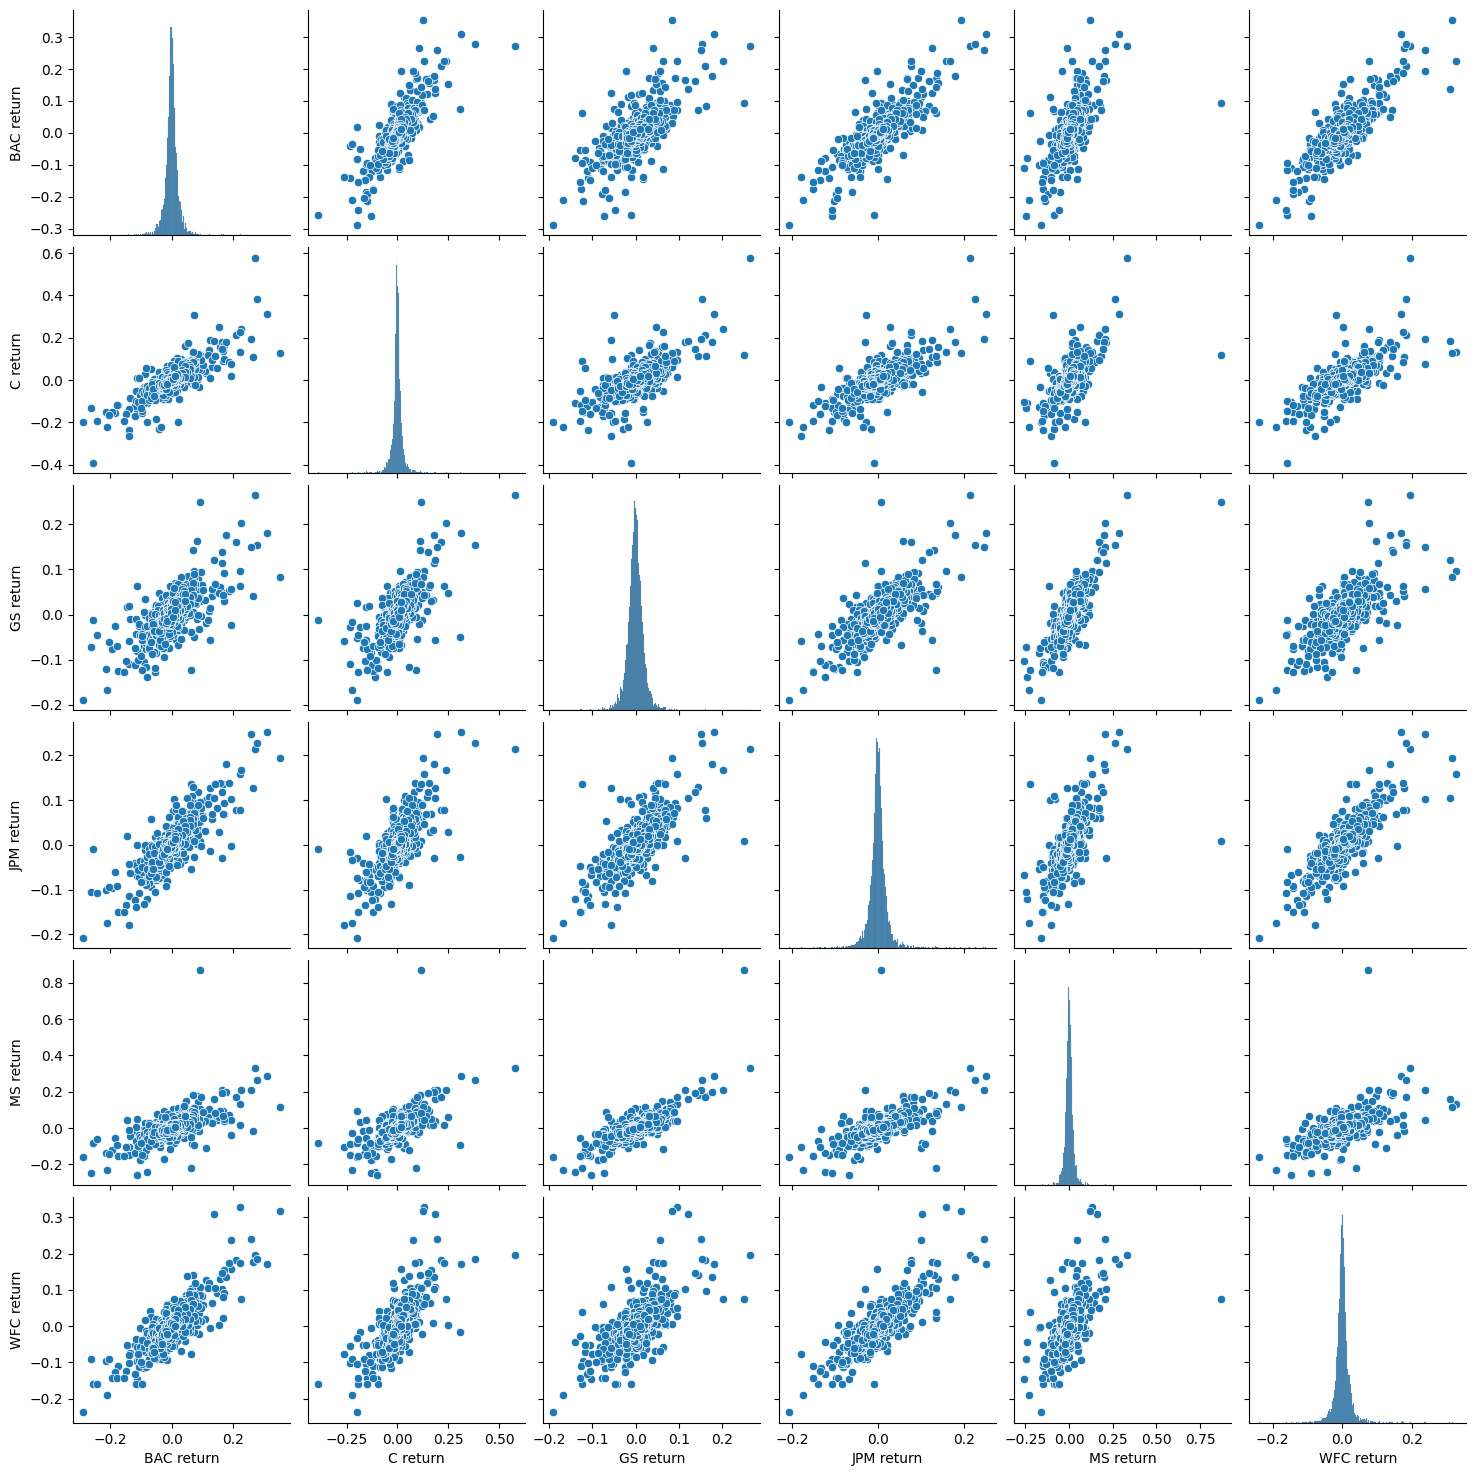

In [16]:
sns.pairplot(returns[1:])

Dates for the Min and Max closing value for the stock prices of different Banks

In [17]:
returns.idxmin()

Symbols
BAC return   2009-01-20
C return     2009-02-27
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [18]:
returns.idxmax()

Symbols
BAC return   2009-04-09
C return     2008-11-24
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [19]:
returns.std()

Symbols
BAC return    0.029191
C return      0.030830
GS return     0.021928
JPM return    0.022932
MS return     0.030805
WFC return    0.025280
dtype: float64

<b>Below distribution plot is for the MS Return for one year suggest scattered data points</b>

C:\Users\ashut\AppData\Local\Temp\ipykernel_15652\3838674918.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='MS return', ylabel='Density'>

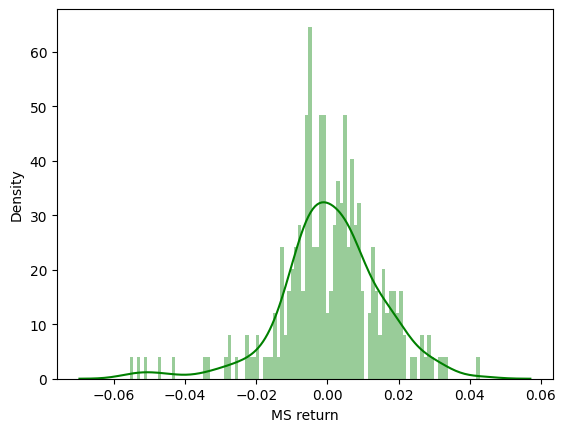

In [20]:
sns.distplot(returns.loc['2017-05-01':'2018-04-30']['MS return'],color='green',bins=100)

<b>Citi Bank distribution for a period of one year suggests high unpredictibility because of the extreme highs and lows in the stock's closing points.</b>

C:\Users\ashut\AppData\Local\Temp\ipykernel_15652\2505620820.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='C return', ylabel='Density'>

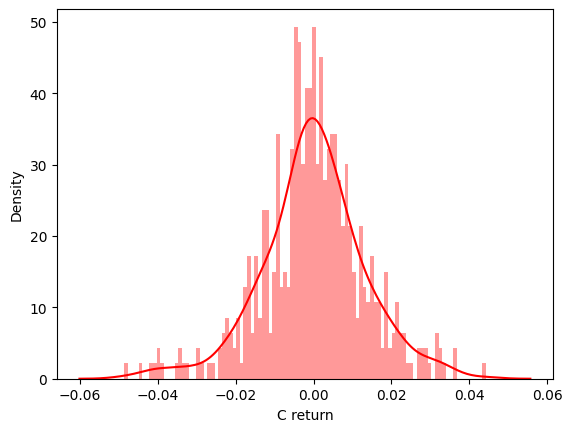

In [21]:
sns.distplot(returns.loc['2017-01-01':'2018-12-31']['C return'], color='red',bins=100)

In [22]:
df['Close']['BAC']

Date
2004-01-02    33.2837
2004-01-05    33.3790
2004-01-06    33.3191
2004-01-07    33.2503
2004-01-08    33.2592
               ...   
2023-09-22    27.6400
2023-09-25    27.6000
2023-09-26    27.1700
2023-09-27    27.2700
2023-09-28    27.5600
Name: BAC, Length: 4969, dtype: float64

<b> Plotting the Closing Stock Price against all the banks to see the pattern and relative uniformity and predictible behaviour. </b>

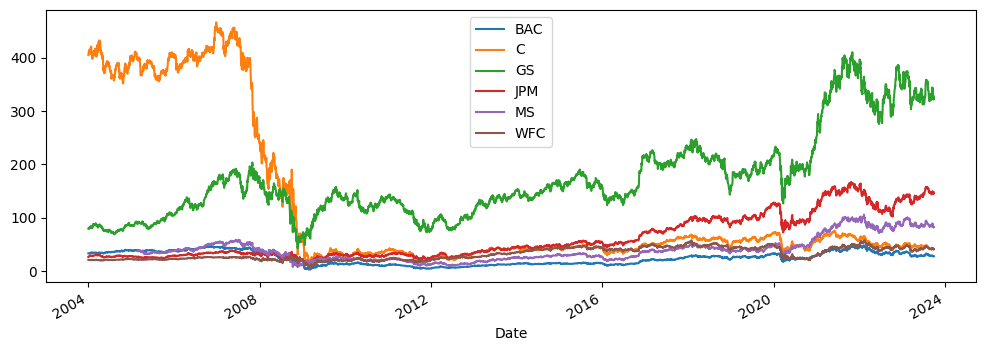

In [23]:
tickers = ['BAC','C','GS','JPM','MS','WFC']
for tick in tickers:
    df['Close'][tick].plot(figsize=(12,4),label=tick)
plt.legend()

<b> The moving average for Closing values of BAC stock prices smooths out the unaveraged values and provide a more general understanding as seen in the below graph </b>

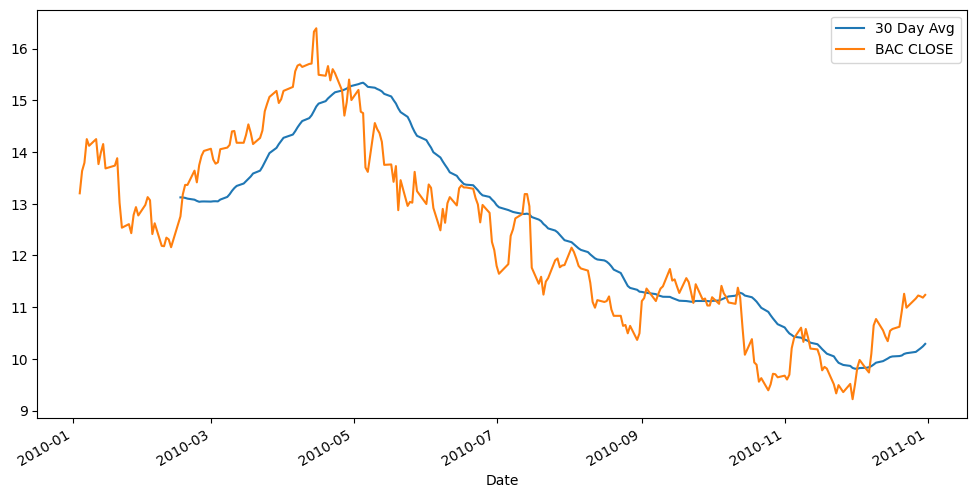

In [24]:
plt.figure(figsize=(12,6))
df['Close']['BAC'].loc['2010-01-01':'2011-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
df['Close']['BAC'].loc['2010-01-01':'2011-01-01'].plot(label='BAC CLOSE')
plt.legend()

<AxesSubplot: xlabel='Symbols', ylabel='Symbols'>

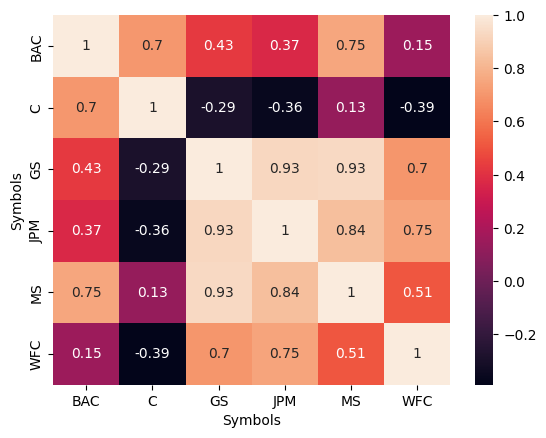

In [25]:
sns.heatmap(df.xs(key='Close',axis=1,level='Attributes').corr(),annot=True )

# Clustered Heatmap of correlated features

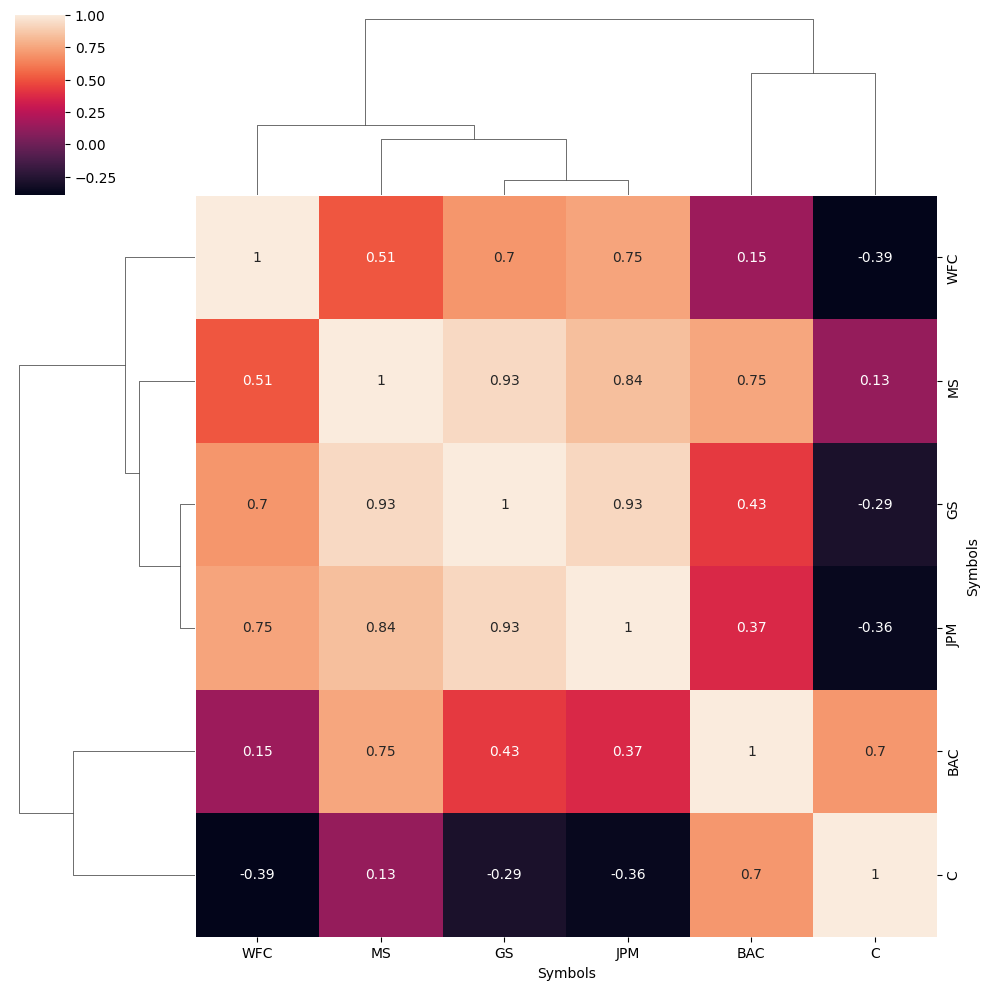

In [26]:
sns.clustermap(df.xs(key='Close',axis=1,level='Attributes').corr(), annot=True)

In [27]:
BAC_read = pd.DataFrame()
attr = ['Open','High','Low','Close']
for att in attr:
    BAC_read['BAC'+att] = df[att]['BAC'].loc['2017-01-01':'2018-04-30']
    

In [28]:
BAC_read.head()

,BACOpen,BACHigh,BACLow,BACClose
Date,,,,
2017-01-03,19.9449,20.0157,19.5933,19.8831
2017-01-04,20.0510,20.2630,19.9449,20.2533
2017-01-05,20.1412,20.2346,19.7210,20.0157
2017-01-06,20.1031,20.1678,19.9086,20.0157
2017-01-09,19.8672,20.0411,19.7701,19.8998


# Preprocessing the data for feeding into the LSTM


In [29]:
df_train = pd.DataFrame()


In [30]:
df_train['Close'] = df['Close']['BAC']

In [31]:
dataset = df_train.values

In [32]:
tdata_len = int(np.ceil(len(dataset)*0.95))

In [33]:
tdata_len

4721

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [35]:
len(scaled_data)

4969

In [36]:
scaled_data.shape

(4969, 1)

In [37]:
train_data = scaled_data[0:int(tdata_len), :]
x_train = []
y_train = []

In [38]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.67174674, 0.673836  , 0.67252281, 0.67101451, 0.67120963,
       0.66475111, 0.66625941, 0.66438499, 0.67306212, 0.66793652,
       0.67101451, 0.68065844, 0.69702397, 0.69583794, 0.69170545,
       0.70079035, 0.69848624, 0.68472736, 0.6885595 , 0.69351191,
       0.69422221, 0.69403148, 0.69583794, 0.69848624, 0.70554764,
       0.69566475, 0.69506406, 0.69831305, 0.69547182, 0.69441952,
       0.6972147 , 0.69441952, 0.69278187, 0.6924596 , 0.69848624,
       0.69351191, 0.69583794, 0.69848624, 0.69773428, 0.69967227,
       0.70311419, 0.7042783 , 0.69967227, 0.7054161 , 0.70255515,
       0.69633559, 0.67994814, 0.67579373, 0.68302832, 0.67459015,
       0.68104648, 0.68429986, 0.68085575, 0.6785933 , 0.66849775,
       0.66658168, 0.66457792, 0.67766595, 0.68104648, 0.68967976])]
[0.6963355904535805]

[array([0.67174674, 0.673836  , 0.67252281, 0.67101451, 0.67120963,
       0.66475111, 0.66625941, 0.66438499, 0.67306212, 0.66793652,
       0.67101451, 0.68065844, 0.697

In [39]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [40]:
x_train.shape

(4661, 60, 1)

In [41]:
!pip install tensorflow


In [42]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')


In [43]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4661/4661 [==============================] - 271s 56ms/step - loss: 9.4993e-04


# Validating the Model

In [44]:
test_data = scaled_data[tdata_len -60:, :]
x_test = []
y_test = dataset[tdata_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

# Root Mean Squared Error
rmse = np.sqrt(np.mean(((pred - y_test)**2)))

8/8 [==============================] - 2s 51ms/step


In [45]:
rmse

2.0776582065146814

<b> Root mean squared error of 0.7352 which is a very good indication of LSTM's ability to sort time series problems </b>

<b> Visualizing the predictions and see how the predictions perform against the real-values </b>

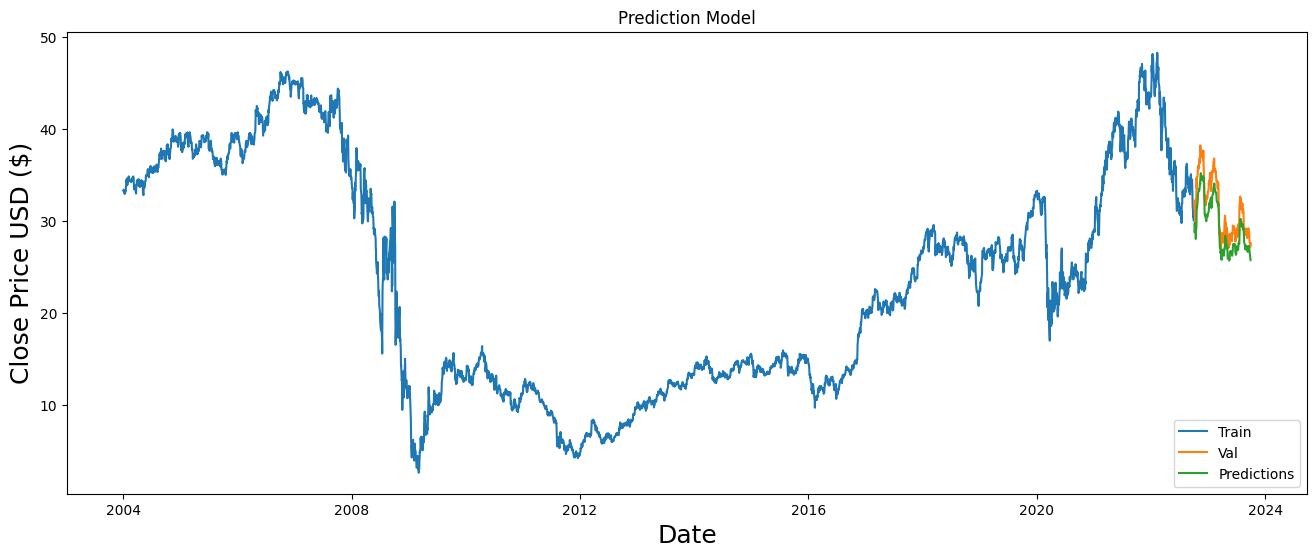

In [46]:
train = df_train[:tdata_len]
valid = df_train[tdata_len:]

valid['Predictions'] = pred

plt.figure(figsize=(16,6))
plt.title('Prediction Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [47]:
valid

,Close,Predictions
Date,,
2022-10-04,32.1918,28.791214
2022-10-05,31.7345,29.589010
2022-10-06,31.2771,29.769920
2022-10-07,30.5713,29.570396
2022-10-10,30.4818,29.094671
...,...,...
2023-09-22,27.6400,26.615267
2023-09-25,27.6000,26.272478
2023-09-26,27.1700,26.089626
